<a href="https://colab.research.google.com/github/tariksghiouri/North-African-Songs-Analysis/blob/main/North_African_Songs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

from google.colab import drive

drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/North_African_Songs_lyrics_dataset/Data'

# List Excel files in the folder
excel_files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_data = pd.DataFrame()

# Loop through each Excel file and concatenate its data to the DataFrame
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    concatenated_data = pd.concat([concatenated_data, df], ignore_index=True)

# Specify the path for the output CSV file in your Google Drive
output_csv_path = '/content/drive/MyDrive/North_African_Songs_lyrics_dataset/Data/lyrics_file.csv'

# Write the concatenated data to a CSV file
concatenated_data.to_csv(output_csv_path, index=False)

print(f"Concatenation completed. Output CSV file saved at {output_csv_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Concatenation completed. Output CSV file saved at /content/drive/MyDrive/North_African_Songs_lyrics_dataset/Data/lyrics_file.csv


In [ ]:
Data=pd.read_csv('/content/drive/MyDrive/North_African_Songs_lyrics_dataset/Data/lyrics_file.csv')
Data.head()

,artist_name,track_name,lyrics,Hamid-El-Shaeri,Ayonha,في ليلة من الليالي\nهايم باللي في بالي\nفي ليلة من الليالي\nهايم باللي في بالي\nبشوف عيون قاتلاني\nهزت عقلي ووجداني\n\nعيونها، لون البحر\nلونها، ضي القمر\nعيونها، لون البحر\nلونها، ضي القمر\n\nريتيك في خيالي\nيا حلم دايماً في بالي\nريتيك في خيالي\nيا حلم دايما في بالي\nيا نسمة في الليالي\nهزت عقلي ووجداني\n\nعيونها، لون البحر (عيونها، لون البحر)\nلونها، ضي القمر (لونها، ضي القمر)\nعيونها، لون البحر (عيونها، لون البحر)\nلونها، ضي القمر (لونها، ضي القمر)\n\nفي ليلة من الليالي\nهايم باللي في بالي\nفي ليلة من الليالي\nهايم باللي في بالي\nبشوف عيون قاتلاني\nهزت عقلي ووجداني\n\nعيونها، لون البحر (عيونها، لون البحر)\nلونها، ضي القمر (لونها، ضي القمر)\nعيونها، لون البحر (عيونها، لون البحر)\nلونها، ضي القمر(لونها، ضي القمر)\nعيونها، لون البحر (عيونها، لون البحر)\nلونها، ضي القمر (لونها، ضي القمر)\n\nعيونها، لون البحر\nلونها، ضي القمر\nعيونها، لون البحر\nلونها، ضي القمر\nعيونها، لون البحر\nلونها، ضي القمر
0,Ayman-Alatar,Rahbiti,آه-اااي\nآي\nهممم\nيا رهبتي وَيَا مهربي\nيا إن...,NaN,NaN,NaN
1,Ka7la,Jisr,الى كل الوطن العربي الى العالمية ksa من\nمن كن...,NaN,NaN,NaN
2,Bahjat,Hometown Smile,Ba-da-da-dum-bum-bum\nBa-da-da-dum-bum-bum\nBa...,NaN,NaN,NaN
3,Bahjat,Hometown Smile - Nightcore Edit,I don′t care what they do\nI just wanna be wit...,NaN,NaN,NaN
4,Bahjat,Istanbul,"Those eyes, they shine\nLike the stars in the ...",NaN,NaN,NaN


In [ ]:
Data=Data.iloc[:, :3]


In [ ]:
# Print all columns of the DataFrame
for column in Data.columns:
  print(column, "\n")

artist_name 

track_name 

lyrics 



In [ ]:
Data.shape[0]

66

In [ ]:
Data.head()

,artist_name,track_name,lyrics
0,Ayman-Alatar,Rahbiti,آه-اااي\nآي\nهممم\nيا رهبتي وَيَا مهربي\nيا إن...
1,Ka7la,Jisr,الى كل الوطن العربي الى العالمية ksa من\nمن كن...
2,Bahjat,Hometown Smile,Ba-da-da-dum-bum-bum\nBa-da-da-dum-bum-bum\nBa...
3,Bahjat,Hometown Smile - Nightcore Edit,I don′t care what they do\nI just wanna be wit...
4,Bahjat,Istanbul,"Those eyes, they shine\nLike the stars in the ..."


In [ ]:
# Remove rows where the 'lyrics' column is empty in the original DataFrame
Data.dropna(subset=['lyrics'], inplace=True)

# Display the first few rows of the modified DataFrame
Data.shape[0]

53

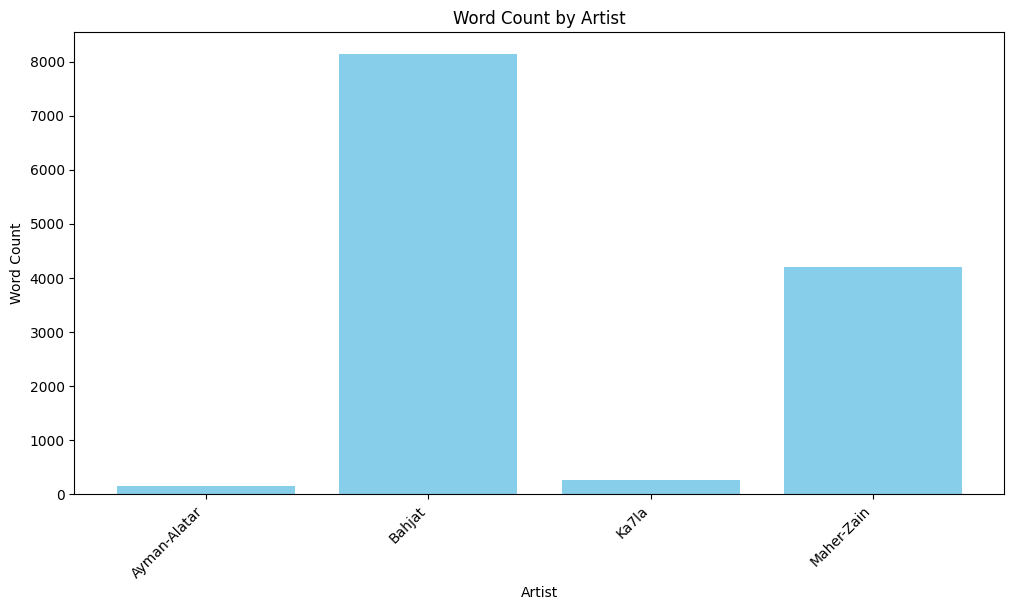

In [ ]:
# Split the lyrics into words and count the number of words
Data['word_count'] = Data['lyrics'].apply(lambda x: len(str(x).split()))

# Group by artist_name and sum the word counts
word_count_by_artist = Data.groupby('artist_name')['word_count'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(word_count_by_artist['artist_name'], word_count_by_artist['word_count'], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Word Count')
plt.title('Word Count by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-40-be863cc0214b>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_sentiments = aggregated_sentiments.append({
<ipython-input-40-be863cc0214b>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_sentiments = aggregated_sentiments.append({
<ipython-input-40-be863cc0214b>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_sentiments = aggregated_sentiments.append({
<ipython-input-40-be863cc0214b>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_sentiments = 

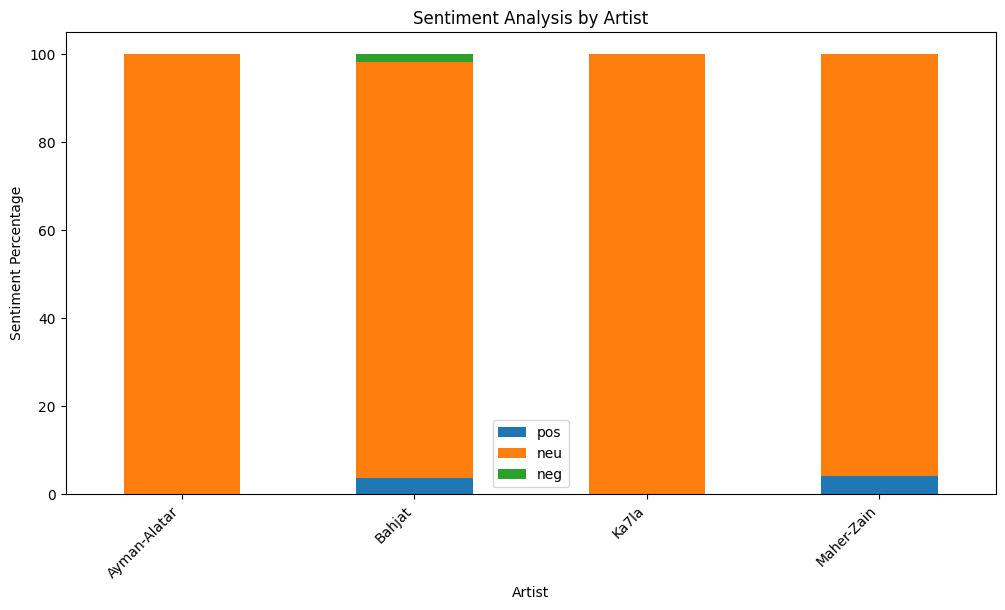

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Assuming 'artist_name' and 'lyrics' columns are present in your DataFrame 'Data'
Data['pos'] = 0
Data['neu'] = 0
Data['neg'] = 0

# Download the vader_lexicon resource
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Create an empty DataFrame to store aggregated sentiment percentages
aggregated_sentiments = pd.DataFrame(columns=['artist_name', 'pos', 'neu', 'neg'])

for artist_name, group in Data.groupby('artist_name'):
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    for lyrics in group['lyrics']:
        for sentence in lyrics.split('\n'):
            comp = sid.polarity_scores(sentence)
            comp = comp['compound']
            if comp >= 0.5:
                num_positive += 1
            elif -0.5 <= comp < 0.5:
                num_neutral += 1
            else:
                num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative / float(num_total)) * 100
    percent_neutral = (num_neutral / float(num_total)) * 100
    percent_positive = (num_positive / float(num_total)) * 100

    # Append aggregated sentiment percentages to the new DataFrame
    aggregated_sentiments = aggregated_sentiments.append({
        'artist_name': artist_name,
        'pos': percent_positive,
        'neu': percent_neutral,
        'neg': percent_negative
    }, ignore_index=True)

# Plotting
aggregated_sentiments.plot.bar(x='artist_name', y=['pos', 'neu', 'neg'], stacked=True, figsize=(12, 6))
plt.xlabel('Artist')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Analysis by Artist')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
print(Data.columns)


Index(['artist_name', 'track_name', 'lyrics'], dtype='object')
